Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re,json,nltk
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
from tensorflow.keras.preprocessing.text import Tokenizer
path ='/content/drive/MyDrive/Bangla drama sentiment analysis/'
stopwords_list = '/content/drive/MyDrive/Bangla drama sentiment analysis/stopwords-bn.txt'
class color: # Text style
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [ ]:
train_path = '/content/drive/MyDrive/datasets/thesis/train_new.xlsx'
test_path = '/content/drive/MyDrive/datasets/thesis/test_new.xlsx'

In [ ]:
train = pd.read_excel(train_path)
train.head()

test = pd.read_excel(test_path)
test.head()


,text,classes
0,"সে যেটা করছে, সেটা ঠিক না।",fear
1,সব কিছু কর্তাদের ইচ্ছাতে হয়,surprise
2,"বর্তমানে সেনাবাহিনীর চাকরি না করে, ফুটপাতে বসে...",joy
3,টাকা পাইলে সব খানকীর ছেলেরা এমন কাজ করে !,joy
4,ম্যাজিস্ট্রেট মহোদয়ের দৃষ্টি আকর্ষণ করছি.... আ...,joy


In [ ]:
from nltk.corpus import stopwords
import re
import pandas as pd

train.text=train.text.astype(str)
test.text=test.text.astype(str)
train = train.dropna()
test = test.dropna()
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score

In [ ]:
len(train.classes.value_counts())

6

In [ ]:
train.classes.unique()

array(['fear', 'sadness', 'joy', 'anger', 'surprise', 'disgust'],
      dtype=object)

In [ ]:
#Checking for NULLs and removing them
train.isnull().sum()

text       0
classes    0
dtype: int64

In [ ]:
#Dropping duplicates
train.shape


(24654, 2)

In [ ]:
test.shape

(2382, 2)

In [ ]:
train.drop_duplicates(inplace=True)


In [ ]:
test.drop_duplicates(inplace=True)

In [ ]:
train.shape

(16821, 2)

In [ ]:
test.shape

(2382, 2)

In [ ]:
train.dropna(thresh=2)

,text,classes
0,সব বিদেশিকে লাথি দিয়ে বের করে দেন,fear
1,আপনি থাকলে সব সম্ভব। হোকনা শুরু যেখান থেকেই... :),sadness
2,দেবী নামের একটি ছবি কিছু দিন আগে সবাই অনেক প্র...,joy
3,তুকে সালাম ভাই।১০০%,sadness
4,"Thank You Sir.আপনার মত মানসিকতা হক সবার,এমনকি ...",sadness
...,...,...
24646,নিউইয়র্ক পুলিশের এক সাবেক স্বেচ্ছাসেবক অভিযোগ ...,joy
24648,এই সময়ের মধ্যে বিসিবি হয়তো ম্যাশের মানের কাছাক...,disgust
24649,ছাগলের 19 নাম্বার বাচ্চার সাথে কিসের একমত? আমা...,joy
24651,জেভিপি'র সাবেক সাংসদ ডা. নালিন্দা জয়াতিসা গত র...,joy


In [ ]:
#Preprocessing the text
print(train['text'].apply(lambda x: len(str(x).split(' '))).sum())

327393


In [ ]:
#Preprocessing the text
print(test['text'].apply(lambda x: len(str(x).split(' '))).sum())

46294


In [ ]:
special_character_remover = re.compile('[/(){}\[\]\|@,;]')
extra_symbol_remover = re.compile('[^0-9a-z #+_]')
STOPWORDS = '/content/drive/MyDrive/Bangla drama sentiment analysis/stopwords-bn.txt'

In [ ]:
'''
def clean_text(text):

    data['text'] = data['text'].apply(lambda x: " ".join(x.lower() for x in str(x).split() \
                                    if x not in STOPWORDS))
    return text


data['text'] = data['text'].apply(clean_text)
'''

'\ndef clean_text(text):\n\n    data[\'text\'] = data[\'text\'].apply(lambda x: " ".join(x.lower() for x in str(x).split()                                     if x not in STOPWORDS))\n    return text\n\n\ndata[\'text\'] = data[\'text\'].apply(clean_text)\n'

In [ ]:
print(train['text'].apply(lambda x: len(x.split(' '))).sum())

327393


In [ ]:
print(test['text'].apply(lambda x: len(x.split(' '))).sum())

46294


In [ ]:
print("Total Reviews:",len(train),
      "\nTotal Joy Reviews:",len(train[train.classes =='joy']),
      "\nTotal Sadness Reviews:",len(train[train.classes=='sadness']),
      "\nTotal Anger Reviews:",len(train[train.classes =='anger']),
      "\nTotal Disgust Reviews:",len(train[train.classes =='disgust']),
      "\nTotal Fear Reviews:",len(train[train.classes =='fear']),
      "\nTotal Surprised Reviews:",len(train[train.classes =='surprise'])
      )

Total Reviews: 16821 
Total Joy Reviews: 4109 
Total Sadness Reviews: 3918 
Total Anger Reviews: 3071 
Total Disgust Reviews: 2366 
Total Fear Reviews: 1656 
Total Surprised Reviews: 1701


In [ ]:
print("Total Reviews:",len(test),
      "\nTotal Joy Reviews:",len(test[test.classes =='joy']),
      "\nTotal Sadness Reviews:",len(test[test.classes=='sadness']),
      "\nTotal Anger Reviews:",len(test[test.classes =='anger']),
      "\nTotal Disgust Reviews:",len(test[test.classes =='disgust']),
      "\nTotal Fear Reviews:",len(test[test.classes =='fear']),
      "\nTotal Surprised Reviews:",len(test[test.classes =='surprise'])
      )

Total Reviews: 2382 
Total Joy Reviews: 397 
Total Sadness Reviews: 397 
Total Anger Reviews: 397 
Total Disgust Reviews: 397 
Total Fear Reviews: 397 
Total Surprised Reviews: 397


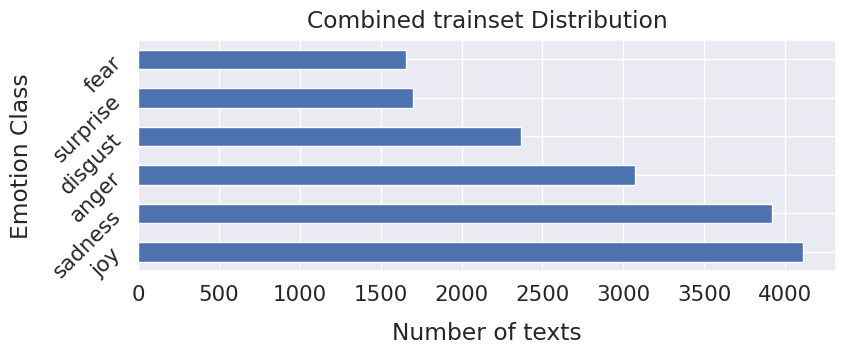

In [ ]:
#dataset visualization
sns.set(font_scale=1.4)
train['classes'].value_counts().plot(kind='barh', figsize=(9, 3))
plt.xlabel("Number of texts", labelpad=12)
plt.ylabel("Emotion Class", labelpad=12)
plt.yticks(rotation = 45)
plt.title("Combined trainset Distribution", y=1.02);

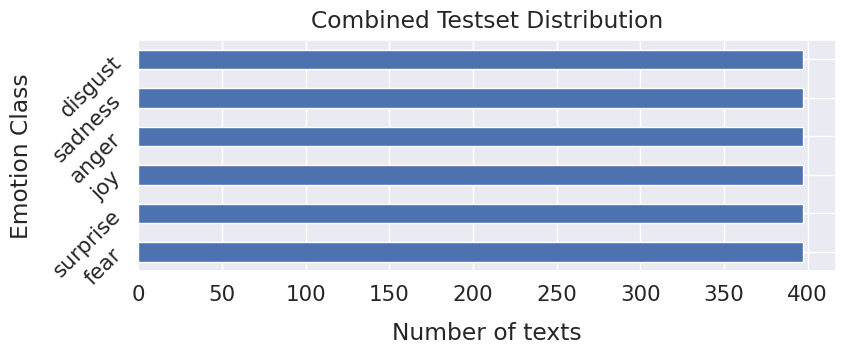

In [ ]:
#dataset visualization
sns.set(font_scale=1.4)
test['classes'].value_counts().plot(kind='barh', figsize=(9, 3))
plt.xlabel("Number of texts", labelpad=12)
plt.ylabel("Emotion Class", labelpad=12)
plt.yticks(rotation = 45)
plt.title("Combined Testset Distribution", y=1.02);

In [ ]:
X_train = train.text
X_test = test.text
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(train.classes)
y_test = le.fit_transform(test.classes)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((16821,), (2382,), (16821,), (2382,))

In [ ]:
#Applying Logistic Regression
#Applying Naive Bayes
#Applying XGBoost

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

lr = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', LogisticRegression()),
              ])

lr.fit(X_train,y_train)
y_pred1 = lr.predict(X_test)

print(f"Accuracy is : {accuracy_score(y_pred1,y_test)}")

Accuracy is : 0.24055415617128464


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.naive_bayes import MultinomialNB


naivebayes = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
naivebayes.fit(X_train, y_train)

y_pred = naivebayes.predict(X_test)

print(f'accuracy {accuracy_score(y_pred,y_test)}')

accuracy 0.20570948782535683


In [ ]:
from xgboost import XGBClassifier

xgboost = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', XGBClassifier()),
              ])
xgboost.fit(X_train, y_train)

y_pred = xgboost.predict(X_test)

print(f'accuracy {accuracy_score(y_pred,y_test)}')

accuracy 0.24937027707808565


In [ ]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 50.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 26.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 98.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 60.3 MB/s eta 0:00:00


In [ ]:
from transformers import BertForSequenceClassification
from torch.utils.data import TensorDataset
import torch
from tqdm.notebook import tqdm
from transformers import BertTokenizer
import torch
from tqdm.notebook import tqdm
from transformers import BertTokenizer

In [ ]:
possible_labels = train.classes.unique()

label_dict = {}
for index, possible_label in enumerate(possible_labels):
    label_dict[possible_label] = index
label_dict

{'fear': 0, 'sadness': 1, 'joy': 2, 'anger': 3, 'surprise': 4, 'disgust': 5}

In [ ]:
#droping a column and replace it with another
train['classes'] = train.classes.replace(label_dict)

In [ ]:
#droping a column and replace it with another
test['classes'] = test.classes.replace(label_dict)

In [ ]:
eval = test

In [ ]:
!pip install simpletransformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.7/250.7 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.2/486.2 kB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 54.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 47.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 54.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.4/209.4 kB 18.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
#Multi-lingual BERT
import pandas as pd

from simpletransformers.classification import ClassificationModel
from sklearn.metrics import f1_score, accuracy_score

# Create a ClassificationModel

model = ClassificationModel("bert", "bert-base-multilingual-uncased", num_labels=6, use_cuda=False, args={
    'max_seq_length': 64,
    'train_batch_size': 16,
    'gradient_accumulation_steps': 1,
    'eval_batch_size': 16,
    'num_train_epochs': 2,
    'weight_decay': 0,
    'learning_rate': 2e-5,
    'adam_epsilon': 1e-8,
    'reprocess_input_data': True,
    'use_cached_eval_features': False,
    'num_train_epochs': 2,
    'silent': True,
    "warmup_ratio": 0.06,
    "warmup_steps": 0,
    "max_grad_norm": 1.0,

    "logging_steps": 50,
    "save_steps": 2000,

    "overwrite_output_dir": True,
    "reprocess_input_data": False,
    "evaluate_during_training": False,

})

# Train the model
model.train_model(train)

# Evaluate the model

def f1_multiclass(classes, text):
    return f1_score(classes, text, average='micro')

result, model_outputs, wrong_predictions = model.eval_model(eval, f1=f1_multiclass, acc=accuracy_score)


Some weights of the model checkpoint at bert-base-multilingual-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingu

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:612: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


In [ ]:
print(result)

{'mcc': 0.29130064167625247, 'f1': 0.3786733837111671, 'acc': 0.3786733837111671, 'eval_loss': 1.4393435360601283}
